In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clothessizeprediction/final_test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/clothessizeprediction/final_test.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
df

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [6]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [8]:
df['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

In [9]:
df['age'] = df['age'].fillna(df['age'].median())
df['height'] = df['height'].fillna(df['height'].median())

In [11]:
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

<AxesSubplot:>

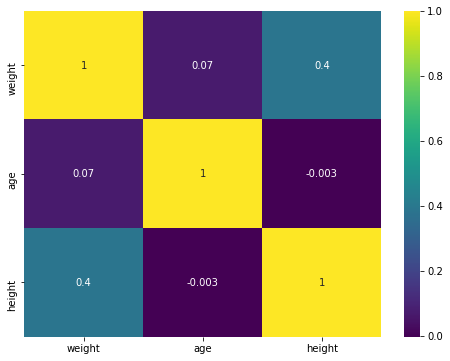

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='viridis')

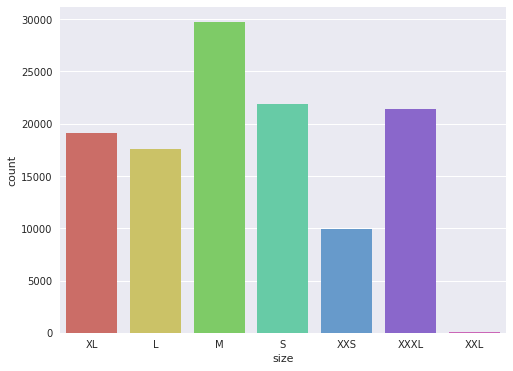

In [13]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=df["size"], palette="hls");

<AxesSubplot:xlabel='height', ylabel='Density'>

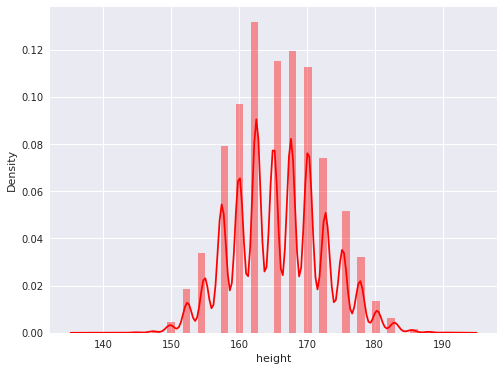

In [14]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df['height'], color='r')

<AxesSubplot:xlabel='weight', ylabel='Density'>

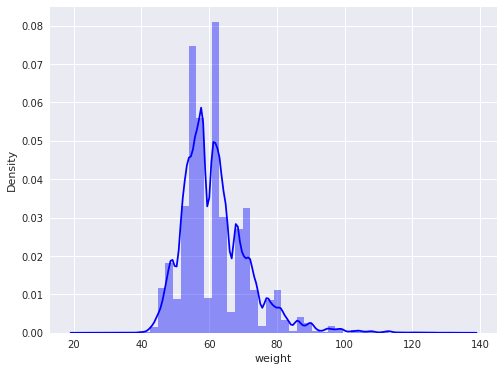

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df['weight'], color='b')

<AxesSubplot:xlabel='age', ylabel='Density'>

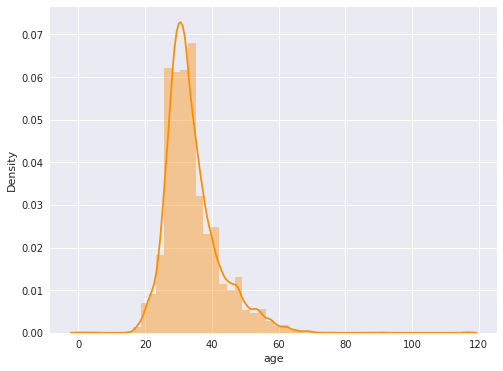

In [16]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df['age'], color='darkorange')

In [17]:
df['size'] = df['size'].map({'XXS':1, 'S':2, 
                            'M':3, 'L':4, 'XL':5, 
                            'XXL':6, 'XXXL' : 7})

In [18]:
df

,weight,age,height,size
0,62,28.0,172.72,5
1,59,36.0,167.64,4
2,61,34.0,165.10,3
3,65,27.0,175.26,4
4,62,45.0,172.72,3
...,...,...,...,...
119729,63,42.0,175.26,3
119730,45,29.0,154.94,2
119731,61,31.0,172.72,3
119732,74,31.0,167.64,5


In [19]:
x = df.drop("size", axis=1)
x.head()

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72


In [20]:
y = df['size']

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [23]:
len(x_train), len(x_test)

(95787, 23947)

In [24]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [25]:
clf.fit(x_train, y_train)

LinearRegression()

In [26]:
clf.predict(x_test)

array([3.93996936, 3.02140342, 2.62931068, ..., 3.20132811, 2.81665395,
       1.95403004])

In [28]:
LinearRegressionScore = clf.score(x_test, y_test)
print("Accuracy obtained by Linear Regression model", 
      LinearRegressionScore*100)

Accuracy obtained by Linear Regression model 65.54306715352199


In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [30]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
model.predict(x_test)

array([3, 3, 2, ..., 3, 3, 2])

In [32]:
np.array(y_test)

array([5, 2, 2, ..., 3, 2, 2])

In [33]:
RandomForestClassifierScore = model.score(x_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 51.59727732074999


In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(42)
clf1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=42)

In [36]:
clf1.predict(x_test)

array([3, 3, 2, ..., 3, 2, 1])

In [37]:
np.array(y_test)

array([5, 2, 2, ..., 3, 2, 2])

In [38]:
KNeighborsClassifierScore = clf1.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 51.70585041967679


In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [40]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
DecisionTreeClassifierScore = tree.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 51.07946715663757


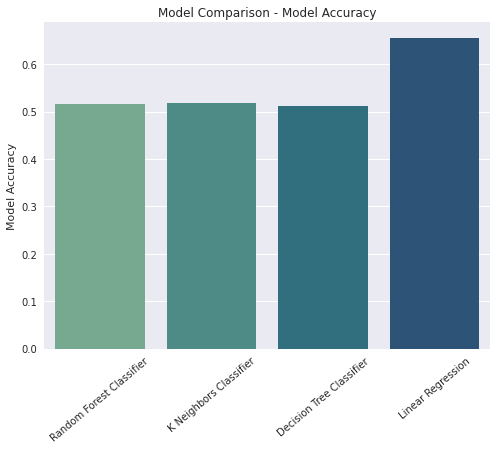

In [43]:
plt.style.use("seaborn")

x = ["Random Forest Classifier", 
     "K Neighbors Classifier", 
     "Decision Tree Classifier", 
     "Linear Regression"]


y = [RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     DecisionTreeClassifierScore, 
     LinearRegressionScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy");

